# **IMPORTING DATA**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic=pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **INFORMATION OF DATA**

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **DATA PREPROCESSING**

**FINDING DUPLICATES**

In [38]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


**Finding missing/null  values**

In [39]:
titanic.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [40]:
print("TOTAL MISSING VALUE :",titanic.isnull().sum().sum() )

TOTAL MISSING VALUE : 866


**Handling missing values**

In [41]:
titanic.fillna({'Age':19}, inplace =True)
titanic.fillna({'Cabin':'C25'}, inplace =True)
titanic.fillna({'Embarked':'S'}, inplace =True)
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C25,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C25,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C25,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,C25,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Encode categorical variables**

In [42]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C25,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C25,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C25,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,C25,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,19.0,1,2,W./C. 6607,23.4500,C25,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


# **Feature Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x=titanic[numerical_features].values
scaler.fit(x)
x_scaled=scaler.transform(x)
print(x_scaled)


[[-1.73010796 -0.78927234  0.82737724 ...  0.43279337 -0.47367361
  -0.50244517]
 [-1.72622007  1.2669898  -1.56610693 ...  0.43279337 -0.47367361
   0.78684529]
 [-1.72233219  1.2669898   0.82737724 ... -0.4745452  -0.47367361
  -0.48885426]
 ...
 [ 1.72233219 -0.78927234  0.82737724 ...  0.43279337  2.00893337
  -0.17626324]
 [ 1.72622007  1.2669898  -1.56610693 ... -0.4745452  -0.47367361
  -0.04438104]
 [ 1.73010796 -0.78927234  0.82737724 ... -0.4745452  -0.47367361
  -0.49237783]]


# **Dimensionality reduction**

variance of 30 components =  99.99999999999999


Text(0, 0.5, 'cumulative explained variance')

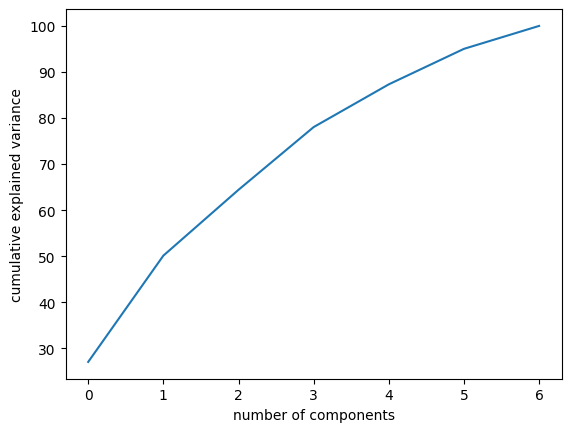

In [44]:
from sklearn.decomposition import PCA
pca_30=PCA(n_components=7,random_state=2020)
pca_30.fit(x_scaled)
x_pca_30=pca_30.transform(x_scaled)
total_variance=sum(pca_30.explained_variance_ratio_*100)
print("variance of 30 components = ",total_variance)

#explained_variance_ratio_ :
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca_30.explained_variance_ratio_*100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


# **Split Data into Training & Testing Sets**

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Define features and target variable
X = titanic.drop(columns=['Survived' , 'Name', 'Ticket', 'Cabin'])
y = titanic['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


# **Train a Machine Learning Model**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.82


# **Generate confusion matrix**

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(f"Correctly predicted 'No Survival' (True Negative)  : {cm[0, 0]}")
print(f"Wrongly predicted 'Survived' instead of 'No Survival' (False Positive)  : {cm[0, 1]}")
print(f"Wrongly predicted 'No Survival' instead of 'Survived' (False Negative)  : {cm[1, 0]}")
print(f"Correctly predicted 'Survived' (True Positive)  : {cm[1, 1]}")


Confusion Matrix:
Correctly predicted 'No Survival' (True Negative)  : 91
Wrongly predicted 'Survived' instead of 'No Survival' (False Positive)  : 14
Wrongly predicted 'No Survival' instead of 'Survived' (False Negative)  : 19
Correctly predicted 'Survived' (True Positive)  : 55


# **Model Evaluation**

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.83      0.87      0.85       105\n           1       0.80      0.74      0.77        74\n\n    accuracy                           0.82       179\n   macro avg       0.81      0.80      0.81       179\nweighted avg       0.81      0.82      0.81       179\n'

# **Test with a New Data Sample**

In [49]:
# Create a new data sample
new_sample = pd.DataFrame({
    'PassengerId': [1000],
    'Pclass': [3],
    'Sex': ['male'],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': ['S']
})

# Ensure the same encoding for 'Sex' and 'Embarked'
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}  # Ensure this matches what was used during training

# Apply encoding
new_sample['Sex'] = new_sample['Sex'].map(sex_mapping)
new_sample['Embarked'] = new_sample['Embarked'].map(embarked_mapping)

# Ensure feature order matches training data
new_sample = new_sample[X_train.columns]

# Make prediction
new_prediction = model.predict(new_sample)

# Print the prediction result
print(f'Prediction for new sample: {"Survived" if new_prediction[0] == 1 else "Did not survive"}')


Prediction for new sample: Did not survive


In [ ]:
print("\nEnter passenger details for survival prediction:")
PassengerId = int(input("Passenger ID: "))
pclass = int(input("Passenger Class (1, 2, 3): "))
sex = input("Sex (male/female): ")
age = float(input("Age: "))
sibsp = int(input("Number of Siblings/Spouses Aboard: "))
parch = int(input("Number of Parents/Children Aboard: "))
fare = float(input("Fare: "))
embarked = input("Embarked (S, C, Q): ")

# Create new data sample
new_sample = pd.DataFrame({
    'PassengerId': [PassengerId],
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

# Use the same mappings as during training
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Apply the mappings
new_sample['Sex'] = new_sample['Sex'].map(sex_mapping)
new_sample['Embarked'] = new_sample['Embarked'].map(embarked_mapping)


# Ensure feature order matches training data
new_sample = new_sample[X_train.columns]

# Make prediction
new_prediction = model.predict(new_sample)

# Print the prediction result
print(f'Prediction for new sample: {"Survived" if new_prediction[0] == 1 else "Did not survive"}')



Enter passenger details for survival prediction:
